In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adam

In [ ]:
# KHYBER PAKHTUNKHWA : 

Saving Khyber Pakhtunkhwa_Updated.csv to Khyber Pakhtunkhwa_Updated (3).csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              183 non-null    datetime64[ns]
 1   Province_State                    183 non-null    object        
 2   Confirmed Cases (n)               183 non-null    int64         
 3   Recovered Cases (n)               183 non-null    int64         
 4   Active Cases (n)                  183 non-null    int64         
 5   Temp (DegC)                       183 non-null    float64       
 6   Wind (Km/Hr)                      183 non-null    float64       
 7   Hum (%)                           183 non-null    float64       
 8   Mask Use (%)                      183 non-null    float64       
 9   Change in Mobility / Soc Dis (%)  183 non-

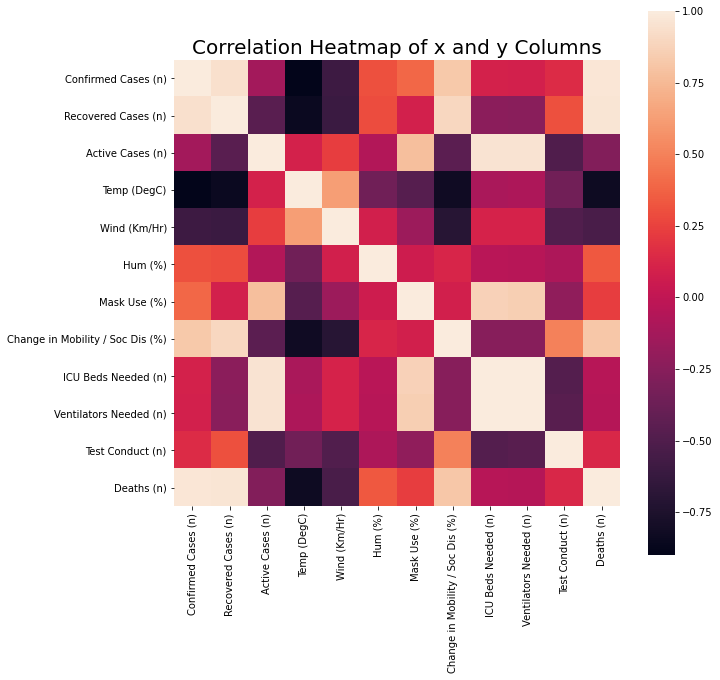

,Confirmed Cases (n),Recovered Cases (n),Active Cases (n),Temp (DegC),Wind (Km/Hr),Hum (%),Mask Use (%),Change in Mobility / Soc Dis (%),ICU Beds Needed (n),Ventilators Needed (n),Test Conduct (n),Deaths (n)
Confirmed Cases (n),1.000000,0.942039,-0.130114,-0.899242,-0.590806,0.303122,0.391897,0.829035,0.098706,0.089477,0.152333,0.976788
Recovered Cases (n),0.942039,1.000000,-0.455216,-0.842306,-0.609055,0.292956,0.088783,0.897812,-0.236708,-0.244883,0.308878,0.968901
Active Cases (n),-0.130114,-0.455216,1.000000,0.100665,0.228969,-0.062960,0.779137,-0.451022,0.961287,0.960932,-0.504389,-0.272235
Temp (DegC),-0.899242,-0.842306,0.100665,1.000000,0.628449,-0.352448,-0.475687,-0.821683,-0.099624,-0.088359,-0.350188,-0.830296
Wind (Km/Hr),-0.590806,-0.609055,0.228969,0.628449,1.000000,0.087230,-0.157850,-0.699907,0.107976,0.107526,-0.498403,-0.533637
Hum (%),0.303122,0.292956,-0.062960,-0.352448,0.087230,1.000000,0.058599,0.119217,-0.031455,-0.041613,-0.088060,0.335253
Mask Use (%),0.391897,0.088783,0.779137,-0.475687,-0.157850,0.058599,1.000000,0.086736,0.868862,0.858207,-0.211309,0.228583
Change in Mobility / Soc Dis (%),0.829035,0.897812,-0.451022,-0.821683,-0.699907,0.119217,0.086736,1.000000,-0.247432,-0.250399,0.497816,0.814560
ICU Beds Needed (n),0.098706,-0.236708,0.961287,-0.099624,0.107976,-0.031455,0.868862,-0.247432,1.000000,0.999329,-0.476564,-0.042663
Ventilators Needed (n),0.089477,-0.244883,0.960932,-0.088359,0.107526,-0.041613,0.858207,-0.250399,0.999329,1.000000,-0.468154,-0.050971


In [ ]:
# preparing data

from google.colab import files
uploaded = files.upload()
df_kpk = pd.read_csv(list(uploaded.keys())[0], parse_dates=['Date'])

print('\n')
print(df_kpk.info());
print('\n')
print(df_kpk.describe())

dff = df_kpk.corr()

fig1 = plt.figure(figsize = (10,10));
plt.title('Correlation Heatmap of x and y Columns', fontsize=20);
sb.heatmap(dff, square = True);
plt.show();

dff

In [ ]:
# data pre processing 

x = df_kpk.iloc[:, 2:-1]
y = df_kpk.iloc[:, -1] 

x = x.drop(['ICU Beds Needed (n)','Ventilators Needed (n)','Test Conduct (n)'], axis = 1)

print('x data shape : ' , x.shape)
print('y data shape : ' , y.shape)
print('\n')

# xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.1, random_state=1)

tr_sz = int(0.8*len(y))
xtr = x.iloc[0:tr_sz , :]
ytr = y[0:tr_sz]
xts = x.iloc[tr_sz: , :]
yts = y[tr_sz:]

print('x-train data shape : ' , xtr.shape)
print('x-test data shape : ' , xts.shape)
print('y-train data shape : ' , ytr.shape)
print('y-test data shape : ' , yts.shape)

x data shape :  (183, 8)
y data shape :  (183,)


x-train data shape :  (146, 8)
x-test data shape :  (37, 8)
y-train data shape :  (146,)
y-test data shape :  (37,)


In [ ]:
# solving via conventional machine learning model : 

reg = LinearRegression() 
reg.fit(xtr , ytr) 

print('\n Actual-y  : \n' , yts.values)

ypr = reg.predict(xts); # y_predicted 
print('\n Predicted-y using lin reg: \n' , np.round(ypr,2))

ytss = np.array(yts); 
res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ytss[i]-ypr[i])/ytss[i])
err = np.sum(res)/len(yts)
print('\nAccuracy obt from lin reg model : ', (1-np.round(err,2))*100,' %')


 Actual-y  : 
 [1339 1344 1346 1355 1359 1368 1369 1375 1378 1389 1399 1404 1413 1419
 1429 1439 1450 1455 1463 1473 1477 1489 1502 1511 1521 1536 1546 1553
 1563 1577 1585 1596 1602 1609 1617 1627 1638]

 Predicted-y using lin reg: 
 [1339.28 1344.37 1346.43 1355.41 1359.39 1368.44 1369.46 1375.53 1378.53
 1389.43 1399.45 1404.54 1413.53 1419.64 1429.68 1439.66 1450.61 1455.66
 1463.72 1473.68 1477.71 1489.66 1502.6  1511.6  1521.63 1536.65 1546.66
 1553.67 1563.62 1577.54 1585.56 1596.54 1602.88 1609.53 1617.58 1627.5
 1638.52]

Accuracy obt from lin reg model :  100.0  %


In [ ]:
# # solving via deep nueral network :  

model = Sequential()

model.add(Dense(128, kernel_initializer='normal',input_shape=(x.shape[1],), activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer='normal',activation='linear', name='output'))

# optimizer = Adam(lr=0.01)
# optimizer = RMSprop(lr=0.01)
# optimizer = SGD(lr=0.01)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])
print(model.summary())

model.fit(xtr, ytr, batch_size=5, epochs=250)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
output (Dense)               (None, 1)                 257       
Total params: 34,433
Trainable params: 34,433
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/250
30/30 [==============================] - 0s 2ms/step - loss: 165.5748 - mean_squared_error: 68671.5654
Epoch 2/250
30/30 [==============================] - 0s 2ms/step - loss: 98.8626 - mean_squared_error: 13872.5546
Epoch 3/250
30/30 [==============================] - 0s 2ms/step - loss: 90.8054 - mean_squared_error: 11374.2534
Epoch 4/250
30/30 [=============

In [ ]:
ypred = model.predict(xts)

ya_kpk = np.array(yts)
yp_kpk = np.array(ypred)

print('\nya_kpk ~vs~ yp_kpk')
for i in range(len(yts)): 
  print(ya_kpk[[i]],'vs',yp_kpk[i]) 

res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ya_kpk[i]-yp_kpk[i])/ya_kpk[i])

err_kpk = np.sum(res)/len(yts)
print('\nAccuracy obt from deep nueral network : ', (1-np.round(err_kpk,2))*100,' %')


ya_kpk ~vs~ yp_kpk
[1339] vs [1487.0721]
[1344] vs [1499.444]
[1346] vs [1508.2913]
[1355] vs [1515.8818]
[1359] vs [1524.719]
[1368] vs [1535.4674]
[1369] vs [1542.529]
[1375] vs [1553.9789]
[1378] vs [1558.6593]
[1389] vs [1565.7307]
[1399] vs [1579.3287]
[1404] vs [1595.6421]
[1413] vs [1611.8195]
[1419] vs [1632.0034]
[1429] vs [1643.8778]
[1439] vs [1649.1576]
[1450] vs [1657.5502]
[1455] vs [1674.2885]
[1463] vs [1691.2274]
[1473] vs [1699.6746]
[1477] vs [1712.9038]
[1489] vs [1718.2766]
[1502] vs [1726.6327]
[1511] vs [1735.0568]
[1521] vs [1750.7977]
[1536] vs [1768.6385]
[1546] vs [1780.2728]
[1553] vs [1787.2372]
[1563] vs [1798.0905]
[1577] vs [1806.5751]
[1585] vs [1821.4576]
[1596] vs [1833.0021]
[1602] vs [1863.8665]
[1609] vs [1853.0664]
[1617] vs [1858.4349]
[1627] vs [1860.381]
[1638] vs [1871.9799]

Accuracy obt from deep nueral network :  86.0  %


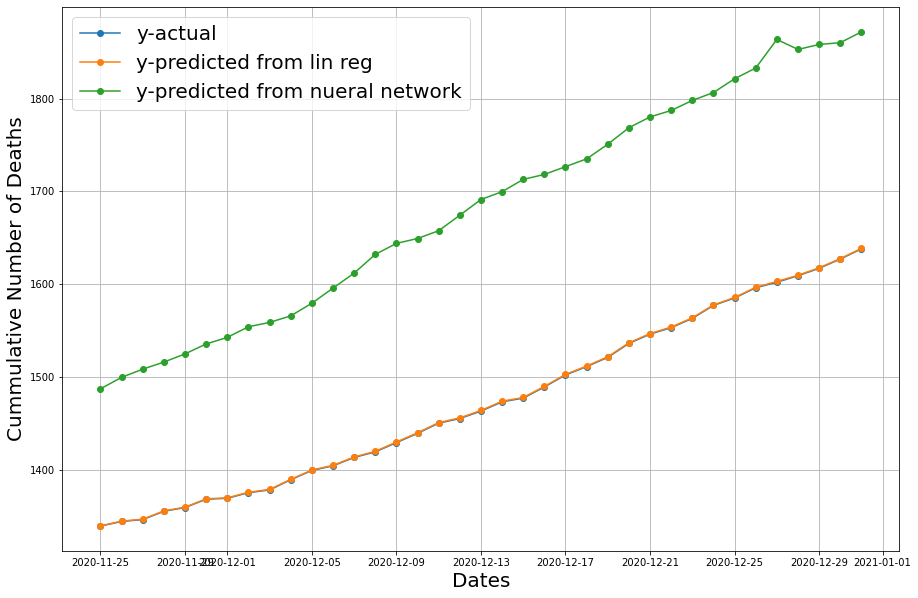

In [ ]:
dts = df_kpk['Date']
end_dts = dts[tr_sz:]

fig2 = plt.figure(figsize = (15,10))
plt.plot(end_dts , ya_kpk, '-o',label='y-actual');
plt.plot(end_dts , ypr, '-o',label='y-predicted from lin reg');
plt.plot(end_dts , yp_kpk, '-o',label='y-predicted from nueral network');
plt.grid(); plt.legend(prop={'size': 20});
plt.xlabel('Dates',fontsize=20); 
plt.ylabel('Cummulative Number of Deaths',fontsize=20); 